In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fake_News_Detection_With_Explainable_AI_Using_Lime-main.zip to Fake_News_Detection_With_Explainable_AI_Using_Lime-main.zip


In [63]:
import zipfile
import os
import pandas as pd
from wordcloud import WordCloud


In [64]:
# Path to the uploaded zip file
zip_path = '/content/Fake_News_Detection_With_Explainable_AI_Using_Lime-main.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/fake_news_detection')

# Verify extraction
os.listdir('/content/fake_news_detection')

['True.csv',
 'Fake.csv',
 '.ipynb_checkpoints',
 'Fake_News_Detection_With_Explainable_AI_Using_Lime-main']

In [65]:
# Load the datasets
true_path = '/content/fake_news_detection/Fake_News_Detection_With_Explainable_AI_Using_Lime-main/True.csv'
fake_path = '/content/fake_news_detection/Fake_News_Detection_With_Explainable_AI_Using_Lime-main/Fake.csv'

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

# Display the first few rows of each dataset
print("True News Dataset:")
print(df_true.head())

print("\nFake News Dataset:")
print(df_fake.head())


True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake News Dataset:
                                               title  \
0  

In [66]:
# Add labels to the datasets
df_true['label'] = 1  # True news
df_fake['label'] = 0  # Fake news

# Combine the datasets
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)

# Display the combined dataset
print("Combined Dataset:")
print(df.head())

Combined Dataset:
                                               title  \
0  DWAYNE ‘THE ROCK’ JOHNSON’S Awesome Message To...   
1  Kremlin calls U.S. allegations of subversive a...   
2  Pence exits NFL game after players kneel durin...   
3  HILLARY Calls On CRANKY SOCIALIST She Stole El...   
4   Mark Zuckerberg’s PERFECT Facebook Comment To...   

                                                text       subject  \
0                                                         politics   
1  MOSCOW (Reuters) - The Kremlin said on Wednesd...     worldnews   
2  WASHINGTON (Reuters) - U.S. Vice President Mik...  politicsNews   
3  Poor Bernie. He s been a public servant his wh...      politics   
4  There are seldom people in life that you can h...          News   

                 date  label  
0        Nov 13, 2016      0  
1  December 13, 2017       1  
2    October 8, 2017       1  
3        Sep 29, 2016      0  
4     January 4, 2016      0  


In [67]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

Dataset shape: (44898, 5)
Columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [68]:
print(df.describe())

              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [69]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


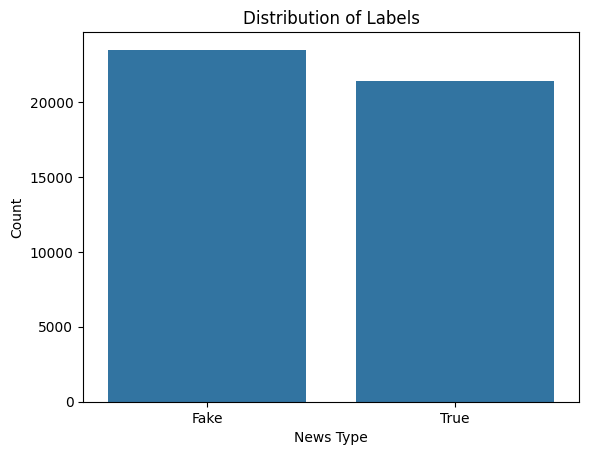

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Fake', 'True'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

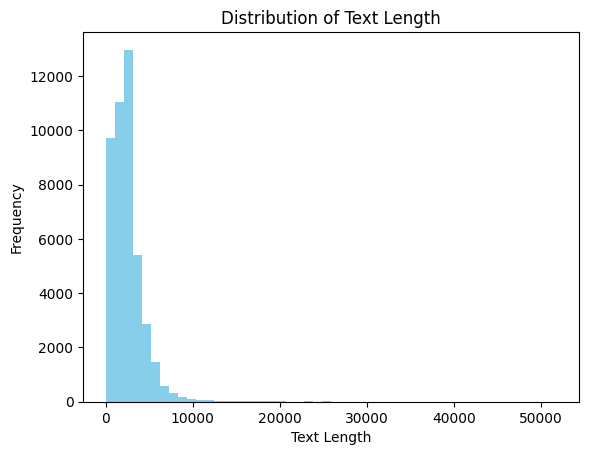

In [71]:
df['text_length'] = df['text'].apply(len)

plt.hist(df['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [72]:
print("Shortest article:")
print(df.loc[df['text_length'].idxmin(), 'text'])

print("\nLongest article:")
print(df.loc[df['text_length'].idxmax(), 'text'])

Shortest article:
 

Longest article:
 Funny how secrets travel. I d start to believe, if I were to bleed.    Lyrics written by David Bowie from the album OutsideShawn Helton 21st Century Wire In the days before the US presidential election in November 2016, Wikileaks revealed a new string of emails connected to Hillary Clinton s 2016 campaign chairman, John Podesta. Online interpretations of the leaked Podesta email exchanges subsequently led to a digital firestorm on social media, producing an intense conspiratorial  open source investigation  still in search of its smoking gun. However, the phenomenon now known by its hashtag #Pizzagate has since set a number of tertiary events into motion. Is there a real story hidden amongst the debris of this online explosion?Is it possible that  open source investigators  were being led into a virtual cul-de-sac and thus missing the real story?More importantly, could people be playing into the hands of the very establishment they seek to depose?

Unique subjects: 8
Subjects distribution:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


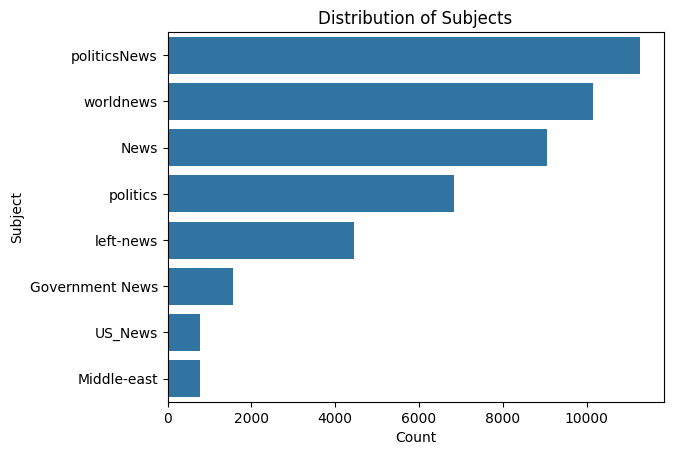

In [73]:
print("Unique subjects:", df['subject'].nunique())
print("Subjects distribution:")
print(df['subject'].value_counts())

# Visualize subject distribution
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index)
plt.title('Distribution of Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

Date range: 2015-03-31 00:00:00 to 2017-12-31 00:00:00


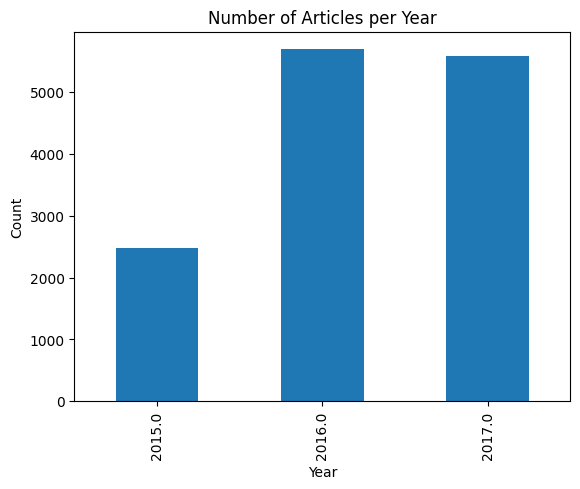

In [74]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
print("Date range:", df['date'].min(), "to", df['date'].max())

# Plot articles over time
df['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

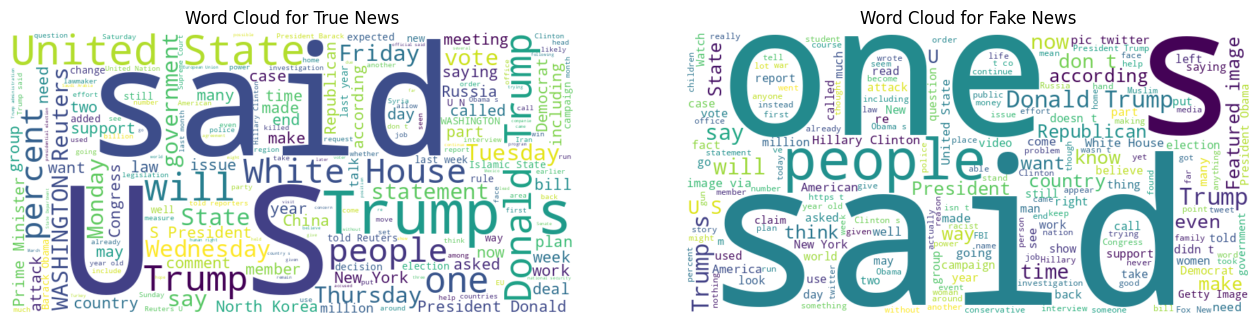

In [75]:
# Word cloud for true news
true_text = ' '.join(df[df['label'] == 1]['text'])
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)

# Word cloud for fake news
fake_text = ' '.join(df[df['label'] == 0]['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.show()

In [76]:
# Previous operations that might have set df to None
# Ensure that df is correctly assigned to a pandas DataFrame
# by reloading or re-executing the DataFrame creation steps.
import pandas as pd

# Reload the datasets
true_path = '/content/fake_news_detection/Fake_News_Detection_With_Explainable_AI_Using_Lime-main/True.csv'
fake_path = '/content/fake_news_detection/Fake_News_Detection_With_Explainable_AI_Using_Lime-main/Fake.csv'

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

# Add labels to the datasets
df_true['label'] = 1  # True news
df_fake['label'] = 0  # Fake news

# Combine the datasets
df = pd.concat([df_true, df_fake]).sample(frac=1).reset_index(drop=True)

# Now you can drop duplicates
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

# Check the shape of the dataset after dropping duplicates
print("Shape after dropping duplicates based on 'text':", df.shape)


Shape after dropping duplicates based on 'text': (38646, 5)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38646 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38646 non-null  object
 1   text     38646 non-null  object
 2   subject  38646 non-null  object
 3   date     38646 non-null  object
 4   label    38646 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB
